In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def phi(p):
    """arcsin transformation"""
    return 2 * np.arcsin(np.sqrt(p))

def logit(p):
    """log odds"""
    return np.log(p / (1 - p))

In [122]:
proportion_text = r"proportion $p$"
phi_text = r"$\phi = 2 \arcsin \sqrt{p}$"
logit_text = r"logit = $\log{\frac{p}{1-p}}$"

probs = np.linspace(start=0, stop=1, num=1000)
phis = phi(probs)
logits = logit(probs)

sparse_probs = np.linspace(start=0, stop=1, num=21)
sparse_phis = phi(sparse_probs)
phi_df = pd.DataFrame({"$p$": sparse_probs, "$\phi$": sparse_phis, 'class': 1})

logit_probs = np.linspace(start=0, stop=1, num=21)
logit_probs[0] = 0.01
logit_probs[-1] = 0.99
logit_probs = np.concatenate([np.array([0.0001, 0.001]),
                              logit_probs,
                              np.array([0.9999, 0.999])])
sparse_logits = logit(logit_probs)
logit_df = pd.DataFrame({"$p$": logit_probs, "logit": sparse_logits, 'class': 1})

in_ticks = [0, 0.5, 1]
in_labels = ["0", "0.5", "1"]

out_ticks = [-np.pi, 0, np.pi]
out_labels = ["$-\pi$", "0", "$\pi$"]

all_ticks = [-np.pi, 0, 0.5, 1, np.pi]
all_labels = ["$-\pi$", 0, 0.5, 1, "$\pi$"]

ylim = [-4, 4]

/var/folders/9f/shbn440959s54mmvk467cj080000gn/T/ipykernel_8153/847057096.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(p / (1 - p))
/var/folders/9f/shbn440959s54mmvk467cj080000gn/T/ipykernel_8153/847057096.py:7: RuntimeWarning: divide by zero encountered in log
  return np.log(p / (1 - p))


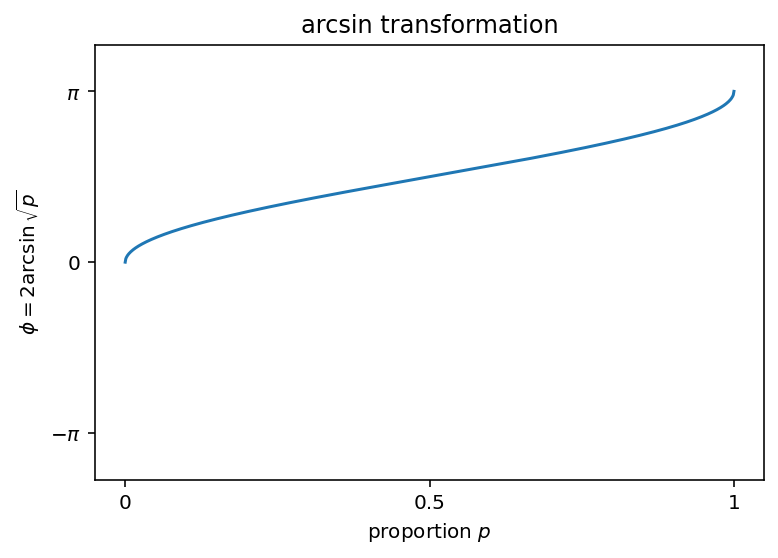

In [123]:
plt.plot(probs, phis)
plt.yticks(ticks=out_ticks, labels=out_labels)
plt.xticks(ticks=in_ticks, labels=in_labels)
plt.ylim(ylim)

plt.xlabel(proportion_text)
plt.ylabel(phi_text)
plt.title("arcsin transformation")

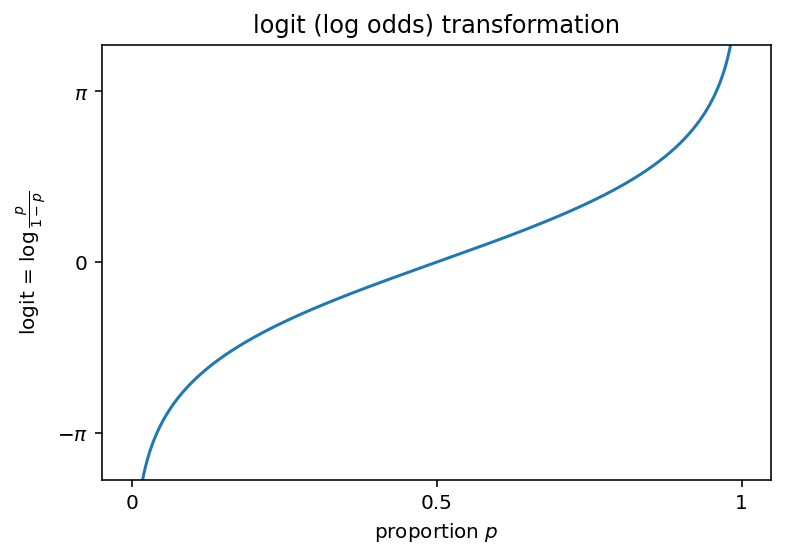

In [124]:
plt.plot(probs, logits)
plt.yticks(ticks=out_ticks, labels=out_labels)
plt.xticks(ticks=in_ticks, labels=in_labels)
plt.ylim(ylim)

plt.xlabel(proportion_text)
plt.ylabel(logit_text)
plt.title("logit (log odds) transformation")

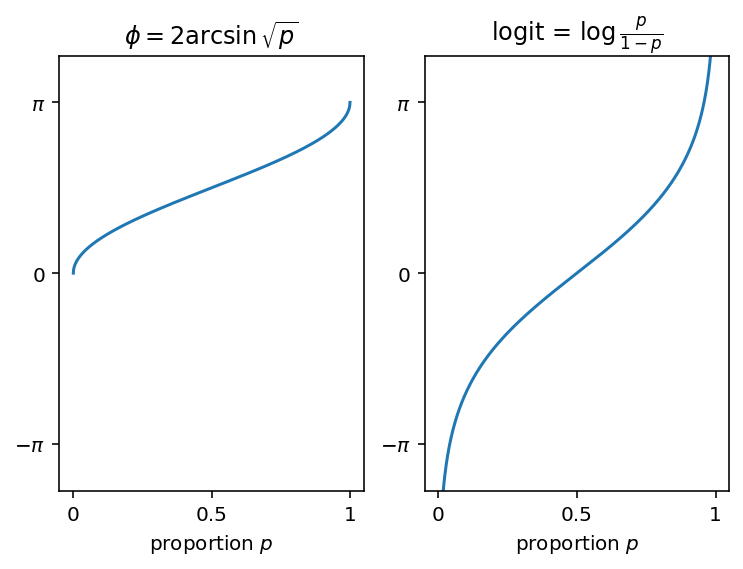

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2)


plt.subplot(1, 2, 1)

plt.plot(probs, phis)
plt.yticks(ticks=out_ticks, labels=out_labels)
plt.xticks(ticks=in_ticks, labels=in_labels)
plt.ylim(ylim)

plt.xlabel(proportion_text)
plt.title(phi_text)


plt.subplot(1, 2, 2)

plt.plot(probs, logits)
plt.yticks(ticks=out_ticks, labels=out_labels)
plt.xticks(ticks=in_ticks, labels=in_labels)
plt.ylim(ylim)

plt.xlabel(proportion_text)
plt.title(logit_text)


plt.savefig('cartesian.png', dpi=240, facecolor='white', bbox_inches='tight')

([<matplotlib.axis.YTick at 0x12708a730>,
 [Text(0, -3.141592653589793, '$-\\pi$'),
  Text(0, 0.0, '0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1'),
  Text(0, 3.141592653589793, '$\\pi$')])

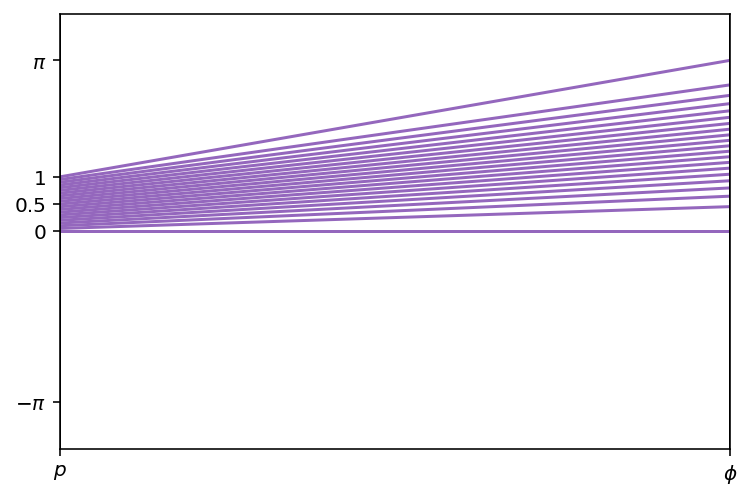

In [126]:
pd.plotting.parallel_coordinates(phi_df, 'class', color='C4')
plt.gca().grid(False)
plt.gca().get_legend().remove()
plt.ylim(ylim)
plt.yticks(ticks=all_ticks, labels=all_labels)

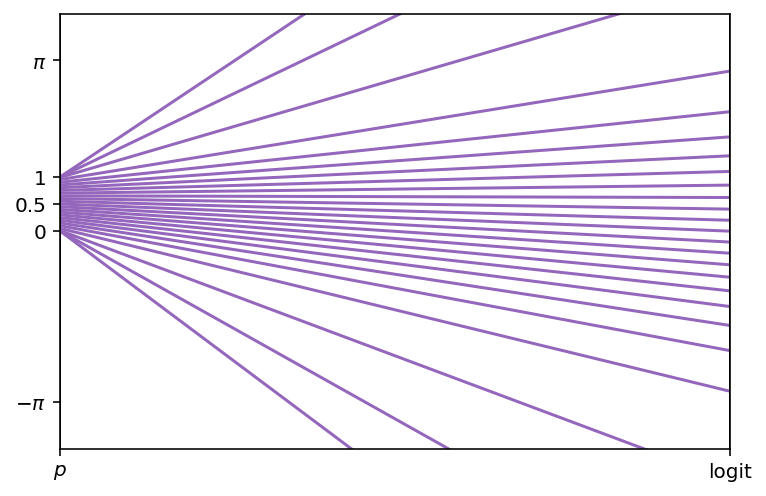

In [127]:
pd.plotting.parallel_coordinates(logit_df, 'class', color='C4')
plt.ylim(ylim)
plt.yticks(ticks=all_ticks, labels=all_labels)
plt.gca().grid(False)
plt.gca().get_legend().remove()

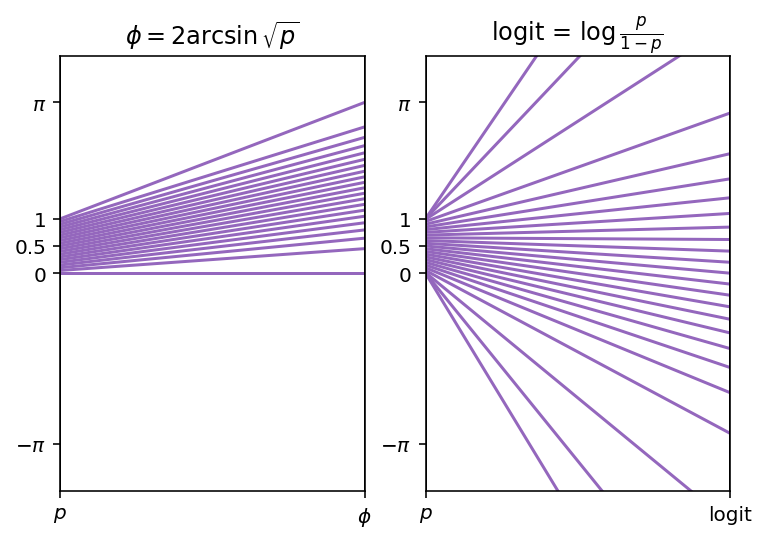

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2)


plt.subplot(1, 2, 1)

pd.plotting.parallel_coordinates(phi_df, 'class', color='C4')
plt.gca().grid(False)
plt.gca().get_legend().remove()
plt.ylim(ylim)
plt.yticks(ticks=all_ticks, labels=all_labels)
plt.title(phi_text)


plt.subplot(1, 2, 2)

pd.plotting.parallel_coordinates(logit_df, 'class', color='C4')
plt.ylim(ylim)
plt.yticks(ticks=all_ticks, labels=all_labels)
plt.gca().grid(False)
plt.gca().get_legend().remove()
plt.title(logit_text)

plt.savefig('parallel.png', dpi=240, facecolor='white', bbox_inches='tight')